In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import os
import numpy as np
from keras.preprocessing import image

In [12]:
train_path=r"C:\Users\GEEK\Downloads\archive (3)\dataset\train"
test_path=r"C:\Users\GEEK\Downloads\archive (3)\dataset\test"
val_path=r"C:\Users\GEEK\Downloads\archive (3)\dataset\validation"

In [13]:
image_classes=os.listdir(train_path)

In [14]:
def plot_imge(image_classes):
    plt.figure(figsize=(10,10))
    index=1
    for category in image_classes:
        img_path=os.path.join(train_path,category)
        img_in_folders=os.listdir(img_path)

        for img in img_in_folders[:4]:
            #first_image=img_in_folders[img]
            view_img_path=os.path.join(img_path,img)
            img=image.load_img(view_img_path)
            img_array=image.img_to_array(img)/255
            
        
            plt.subplot(4,4,index)
            plt.imshow(img_array)
            plt.title(category)
            index+=1
            if index>16:
                break
            plt.axis('off')

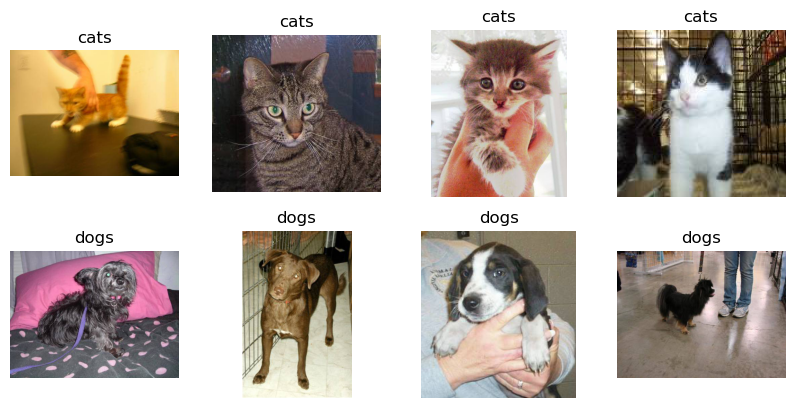

In [15]:
plot_imge(image_classes)

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_generator=ImageDataGenerator(
      rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [17]:
train_data=image_generator.flow_from_directory(
    train_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='sparse'
)
test_data=image_generator.flow_from_directory(
    test_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='sparse'
)
val_data=image_generator.flow_from_directory(
    val_path,
    target_size=(64,64),
    batch_size=32,
    class_mode='sparse'
)

Found 20000 images belonging to 2 classes.
Found 12461 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [27]:
def train_test(folder, max_batches=None):
    X_list = []
    Y_list = []

    total_batches = len(folder) if max_batches is None else min(len(folder), max_batches)

    for i in range(total_batches):
        x_batch, y_batch = folder[i]
        X_list.append(x_batch)
        Y_list.append(y_batch)

    X = np.concatenate(X_list, axis=0)
    Y = np.concatenate(Y_list, axis=0)

    print("Before reshape:", X.shape, Y.shape)
    return X, Y


In [28]:
x_train, y_train = train_test(train_data)
x_test, y_test = train_test(test_data)


x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

print("After reshape:", x_train.shape, y_train.shape)


Before reshape: (20000, 64, 64, 3) (20000,)
Before reshape: (12461, 64, 64, 3) (12461,)
After reshape: (20000, 12288) (20000,)


In [41]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


x_small = x_train[:2000]
y_small = y_train[:2000]
x_test_small = x_test[:1000]
y_test_small = y_test[:1000]


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=100)),   
    ('svc', SVC())
])


param_grid = {
    'svc__kernel': ['rbf', 'poly', 'sigmoid'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': ['scale', 0.01, 0.001]
}


grid = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)


grid.fit(x_small, y_small)


print("Parameters:", grid.best_params_)
print("CV Score:", grid.best_score_)


y_pred = grid.predict(x_test_small)


print("\nClassification report:")
print(classification_report(y_test_small, y_pred))


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Parameters: {'svc__C': 1, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
CV Score: 0.6104913008960985

Classification report:
              precision    recall  f1-score   support

         0.0       0.58      0.52      0.55       501
         1.0       0.57      0.63      0.60       499

    accuracy                           0.57      1000
   macro avg       0.58      0.57      0.57      1000
weighted avg       0.58      0.57      0.57      1000



In [40]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


pca = PCA(n_components=200) 
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)


model = SVC(C=1, gamma='scale', kernel='rbf')
model.fit(x_train_pca, y_train)


y_pred = model.predict(x_test_pca)
print("\nClassification report:")
print(classification_report(y_test, y_pred))



Classification report:
              precision    recall  f1-score   support

         0.0       0.64      0.64      0.64      6242
         1.0       0.64      0.64      0.64      6219

    accuracy                           0.64     12461
   macro avg       0.64      0.64      0.64     12461
weighted avg       0.64      0.64      0.64     12461

